## Loading Data

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Student Performance.csv')

## Obtain label features

In [2]:
# convert these data into 2D numpy array
# order: math percentage, reading score percentage, writing score percentage
X = np.array([[df['math percentage'][0], 
              df['reading score percentage'][0], 
              df['writing score percentage'][0]]], 
             dtype = 'float')
for i in range(1,1000):
    X = np.append(X, [[df['math percentage'][i], 
                  df['reading score percentage'][i], 
                  df['writing score percentage'][i]]],axis=0)
print('feature matrix')
print(X)
print('size: ' + str(X.shape))
print()

# Standard = 0, Free/Reduced = 1
if(df['lunch'][0] == 'standard'):
    first_elem = 0
else:
    first_elem = 1
    
y = np.array([first_elem], dtype = 'int')
for i in range(1,1000):
    if(df['lunch'][i] == 'standard'):
        y = np.append(y, 0)
    else:
        y = np.append(y, 1)
print('Labels')
print(y)
print('size: ' + str(y.shape))

feature matrix
[[0.72 0.72 0.74]
 [0.69 0.9  0.88]
 [0.9  0.95 0.93]
 ...
 [0.59 0.71 0.65]
 [0.68 0.78 0.77]
 [0.77 0.86 0.86]]
size: (1000, 3)

Labels
[0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0

In [3]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=6.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

 ## Voting

In [5]:
clf1 = KNeighborsClassifier(n_neighbors=45)
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier(max_depth=3)
clf4 = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

In [6]:
eclf1 = VotingClassifier (estimators= [('KNN', clf1), ('lr', clf2), ('dt', clf3), ('rf', clf4)], voting = 'hard')
eclf1 = eclf1.fit(X_train, y_train)

In [7]:
eclf2 = VotingClassifier (estimators= [('KNN', clf1), ('lr', clf2), ('dt', clf3), ('rf', clf4)], voting = 'soft')
eclf2 = eclf2.fit(X_train, y_train)

## Accuracy

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
y_predict = eclf1.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.6933333333333334


In [10]:
y_predict = eclf2.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7033333333333334


In [12]:
# Predicting the Binary Label:
y_predict = eclf2.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = eclf2.predict_proba(X_test)

In [13]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob[:,1])

[0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0]
[0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 1 0 

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [14]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=0)

print(fpr)
print(tpr)

[0.         0.00884956 0.02654867 0.02654867 0.0619469  0.0619469
 0.08849558 0.08849558 0.10619469 0.10619469 0.15044248 0.15044248
 0.16814159 0.16814159 0.18584071 0.18584071 0.22123894 0.22123894
 0.24778761 0.24778761 0.25663717 0.25663717 0.30088496 0.30088496
 0.32743363 0.32743363 0.34513274 0.34513274 0.3539823  0.3539823
 0.39823009 0.39823009 0.40707965 0.40707965 0.4159292  0.4159292
 0.43362832 0.43362832 0.44247788 0.44247788 0.46017699 0.46017699
 0.47787611 0.47787611 0.50442478 0.50442478 0.52212389 0.52212389
 0.53097345 0.53097345 0.53982301 0.53982301 0.54867257 0.54867257
 0.56637168 0.56637168 0.57522124 0.57522124 0.61061947 0.61061947
 0.61946903 0.61946903 0.62831858 0.62831858 0.63716814 0.63716814
 0.6460177  0.6460177  0.67256637 0.67256637 0.68141593 0.68141593
 0.69911504 0.69911504 0.72566372 0.72566372 0.73451327 0.73451327
 0.75221239 0.75221239 0.76106195 0.76106195 0.7699115  0.7699115
 0.77876106 0.77876106 0.78761062 0.78761062 0.80530973 0.80530973

# AUC:

In [15]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.314679854242582


# ROC Curve:

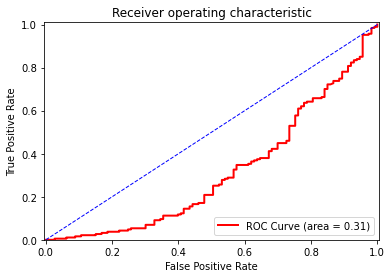

In [16]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Conclusion
### Model accuracy: 0.69 with hard voting
### Model accuracy: 0.70 with soft voting